In [95]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime

In [96]:
with open('sources.txt') as f:
    text = f.read().split('\n')

times = {}
for line in text:
    tokens = line.split(' ')
    t = ' '.join(tokens[2:])
    times[tokens[0]] = t

In [97]:
times

{'1': '2021-11-01',
 '2': '2021-03-16',
 '3': '2021-04-27',
 '4': '2021-04-26',
 '5': '2021-04-29',
 '6': '2021-05-05',
 '7': '2021-03-05',
 '8': '2021-08-17',
 '9': '2021-05-13',
 '10': '2021-06-01',
 '11': '2021-06-19',
 '12': '2021-09-14',
 '13': '2021-10-01',
 '14': '2022-02-01',
 '15': '2022-01-26',
 '16': '2021-05-01',
 '17': '2022-02-21',
 '18': '2021-03-01'}

In [98]:
time_order = [7, 2, 4, 3, 5, 6, 9, 16, 10, 11, 8, 12, 13, 1, 15, 14]

In [99]:
len(times), len(time_order)

(18, 16)

In [100]:
def capitalize(text):
    if text in ['US', 'USA', 'U. S']:
        return 'U.S.'
    if text in ['UK', 'United Kingdom']:
        return 'U.K.'
    if text in ['Spanish']:
        return 'Spain'
    if text in ['Dutch']:
        return 'Netherland'
    if text in ['German']:
        return 'Germany'
    if text in ['Polish']:
        return 'Poland'
    if text.lower() in ['european']:
        return 'Europe'
    if 'google play' in text.lower():
        return 'Google Play'
    if '.' in text:
        return text
    return text.capitalize()

### location targetted by time

In [101]:
data = []
uniq = set()

for t in time_order:
    fname = 'data/' + str(t) + '-coref-resolved.ann'
    
    with open(fname, 'r', encoding='utf-8') as f:
        ann = f.read()
    
    report_time = times[str(t)]
    if ',' in report_time:
        report_time = report_time.split(',')[0].split(' ')[0] + report_time.split(',')[1]
    
    entities = {}
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'T':
            e_id, desc, e_text = line.split('\t')
            cls = desc.split()[0]
            entities[e_id] = cls, e_text
            
    
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'R':
            _, desc, _ = line.split('\t')
            rel_type = desc.split(' ')[0]
            e1_id = desc.split(' ')[1].split(':')[1]
            e2_id = desc.split(' ')[2].split(':')[1]
            
            e1_cls, e1_text = entities[e1_id]
            e2_cls, e2_text = entities[e2_id]
            e1_text = capitalize(e1_text)
            e2_text = capitalize(e2_text)
            
            if e1_text != 'Medusa' and e1_cls == 'Malware' and rel_type == 'targets' and e2_cls == 'Location':
                if e2_text not in uniq:
                    data.append([report_time, e2_text])
                    uniq.add(e2_text)

merged_data = []

for d in data:
    found = False
    for item in merged_data:
        if d[0] == item[0]:
            found = True
            item[1] += '\n'+d[1]
    if not found:
        merged_data.append(d)

In [102]:
merged_data

[['2021-03-05', 'Spain'],
 ['2021-03-16', 'Poland'],
 ['2021-04-26',
  'Germany\nU.K.\nJapan\nItaly\nNorway\nSweden\nFinland\nDenmark\nNetherlands'],
 ['2021-04-27', 'Europe\nHungary\nU.S.'],
 ['2021-05-01', 'Netherland'],
 ['2021-06-01', 'Ireland\nGreece\nArgentine\nAustria\nFrance'],
 ['2021-06-19', 'Switzerland'],
 ['2022-01-26', 'Australia']]

In [103]:
names = [x[1] for x in merged_data]

dates = [x[0] for x in merged_data]

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

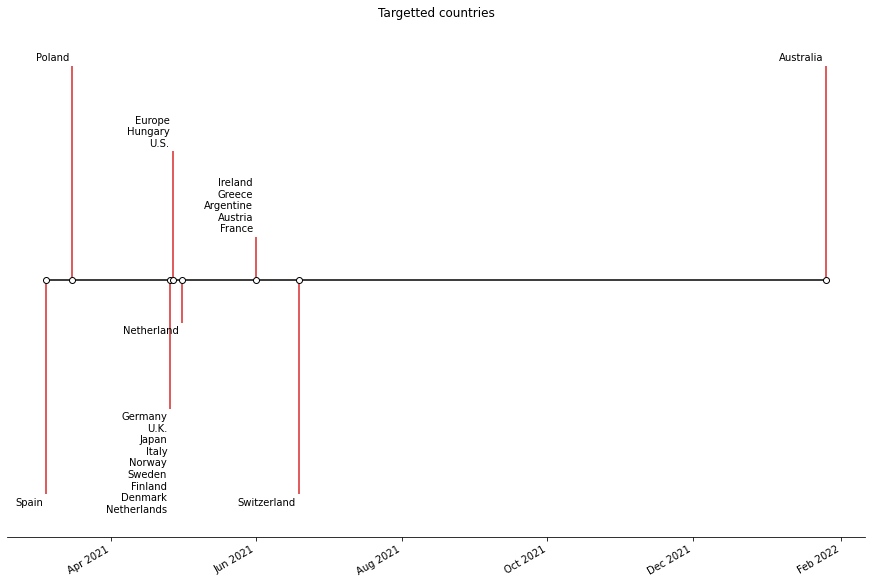

In [104]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
ax.set(title="Targetted countries")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 2 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

### Organizations targetted over time


In [105]:

data = []
uniq = set()

for t in time_order:
    fname = 'data/' + str(t) + '-coref-resolved.ann'
    
    with open(fname, 'r', encoding='utf-8') as f:
        ann = f.read()
    
    report_time = times[str(t)]
    if ',' in report_time:
        report_time = report_time.split(',')[0].split(' ')[0] + report_time.split(',')[1]
    
    entities = {}
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'T':
            e_id, desc, e_text = line.split('\t')
            cls = desc.split()[0]
            entities[e_id] = cls, e_text
            
    
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'R':
            _, desc, _ = line.split('\t')
            rel_type = desc.split(' ')[0]
            e1_id = desc.split(' ')[1].split(':')[1]
            e2_id = desc.split(' ')[2].split(':')[1]
            
            e1_cls, e1_text = entities[e1_id]
            e2_cls, e2_text = entities[e2_id]
#             e1_text = capitalize(e1_text)
#             e2_text = capitalize(e2_text)
            
            if e1_text != 'Medusa' and e1_cls == 'Malware' and rel_type == 'targets' and e2_cls == 'Organization':
                if e2_text not in uniq:
                    data.append([report_time, e2_text])
                    uniq.add(e2_text)
                    print(t, e2_id, e2_text)

merged_data = []

for d in data:
    found = False
    for item in merged_data:
        if d[0] == item[0]:
            found = True
            item[1] += '\n'+d[1]
    if not found:
        merged_data.append(d)

16 T52 UPS
8 T7 Australian banks
8 T4 Polish
8 T5 German banks
12 T30 Deutsche Telekom’
12 T67 DHL
12 T71 FedEx
12 T72 Correos
13 T81 German


In [106]:
data

[['2021-05-01', 'UPS'],
 ['2021-08-17', 'Australian banks\nPolish\nGerman banks'],
 ['2021-08-17', 'Polish'],
 ['2021-08-17', 'German banks'],
 ['2021-09-14', 'Deutsche Telekom’\nDHL\nFedEx\nCorreos'],
 ['2021-09-14', 'DHL'],
 ['2021-09-14', 'FedEx'],
 ['2021-09-14', 'Correos'],
 ['2021-10-01', 'German']]

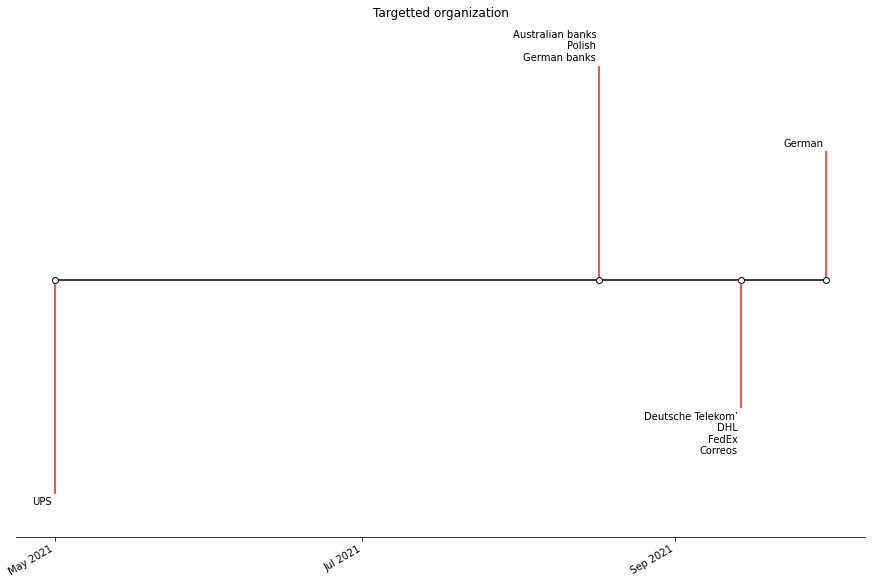

In [107]:
names = [x[1] for x in merged_data]

dates = [x[0] for x in merged_data]

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
ax.set(title="Targetted organization")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 2 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

### Systems targetted over time


In [111]:
data = []
uniq = set()

for t in time_order:
    fname = 'data/' + str(t) + '-coref-resolved.ann'
    
    with open(fname, 'r', encoding='utf-8') as f:
        ann = f.read()
    
    report_time = times[str(t)]
    if ',' in report_time:
        report_time = report_time.split(',')[0].split(' ')[0] + report_time.split(',')[1]
    
    entities = {}
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'T':
            e_id, desc, e_text = line.split('\t')
            cls = desc.split()[0]
            entities[e_id] = cls, e_text
            
    
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'R':
            _, desc, _ = line.split('\t')
            rel_type = desc.split(' ')[0]
            e1_id = desc.split(' ')[1].split(':')[1]
            e2_id = desc.split(' ')[2].split(':')[1]
            
            e1_cls, e1_text = entities[e1_id]
            e2_cls, e2_text = entities[e2_id]
            e1_text = capitalize(e1_text)
            e2_text = capitalize(e2_text)
            
            if e1_text != 'Medusa' and e1_cls == 'Malware' and rel_type == 'targets' and e2_cls == 'System':
                if e2_text not in uniq:
                    data.append([report_time, e2_text])
                    uniq.add(e2_text)
                    # print(t, e2_id, e2_text)

merged_data = []

for d in data:
    found = False
    for item in merged_data:
        if d[0] == item[0]:
            found = True
            item[1] += '\n'+d[1]
    if not found:
        merged_data.append(d)

In [112]:
# data

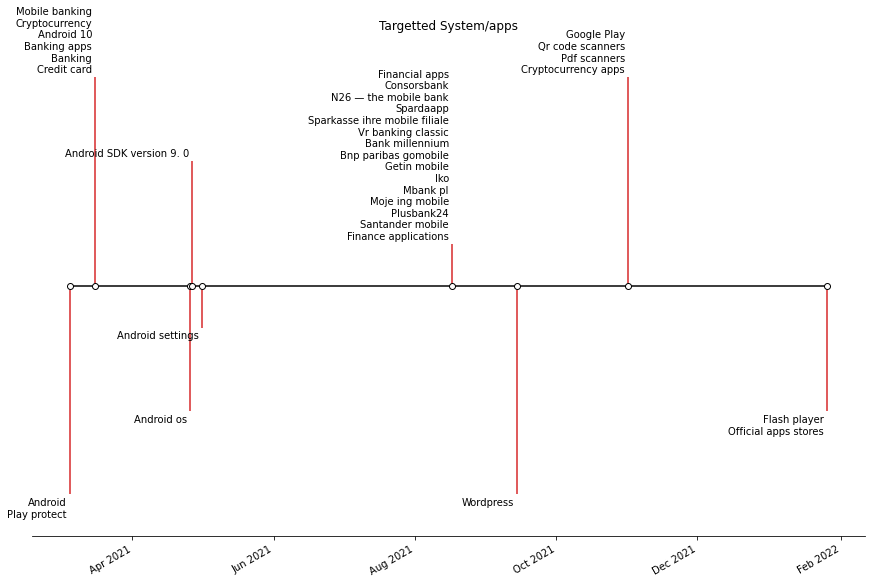

In [113]:
names = [x[1] for x in merged_data]

dates = [x[0] for x in merged_data]

dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
ax.set(title="Targetted System/apps")

ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
ax.plot(dates, np.zeros_like(dates), "-o",
        color="k", markerfacecolor="w")  # Baseline and markers on it.

# annotate lines
for d, l, r in zip(dates, levels, names):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# format xaxis with 2 month intervals
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [114]:
### attack patterns summarization

In [17]:
from summarizer import Summarizer

In [18]:
model = Summarizer()

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Attack pattern summary over all documents

In [115]:
data = []
uniq = {}

for t in time_order:
    fname = 'data/' + str(t) + '-coref-resolved.ann'
    
    with open(fname, 'r', encoding='utf-8') as f:
        ann = f.read()
    
    report_time = times[str(t)]
    if ',' in report_time:
        report_time = report_time.split(',')[0].split(' ')[0] + report_time.split(',')[1]
    
    entities = {}
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'T':
            e_id, desc, e_text = line.split('\t')
            if e_text[-1] == '.':
                e_text = e_text[:-1]
            cls = desc.split()[0]
            if cls == 'AttackPattern' and e_text not in uniq:
                data.append([e_text, report_time])
                uniq[e_text] = report_time

In [116]:
len(data)

415

In [117]:
body = '. '.join([x[0] for x in data])

In [118]:
result = model(body, num_sentences=25)
full = ''.join(result)

In [119]:
print(full)

steal the victim’s contact lists to enrich the malware gang’s SMS spam target list. worm-like mechanism inside its code that allows the malware’s operator to collect the victim’s address book. samples are packed with Tencent’s Legu Packer application. ( connects to the first one that resolves to an IP address and is not offline. captured the victim’s credit card information. uses the HTTP Using POST method on port 80 with POST body encrypted. steal all the necessary data to successfully defraud the user. grants itself all the other permissions it needs to conduct malicious activity without the victim’s knowledge and without the victim needing to accept further permission requests. presenting a fake overlay login screen on top of the legitimate app. disguise themselves by using the brand names of package delivery services. register as the default messaging app on the phone. using a custom packer and evasion mechanisms to complicate detection and analysis of the malware. spread most of t

In [120]:
from nltk.tokenize import sent_tokenize

In [121]:
sents = sent_tokenize(full)

In [122]:
sents = [x[:-1] for x in sents]

In [123]:
len(sents)

25

In [124]:
for s in sents:
    t = 'NA'
    if s in uniq:
        t = uniq[s]
    print(s, t)

steal the victim’s contact lists to enrich the malware gang’s SMS spam target list 2021-03-05
worm-like mechanism inside its code that allows the malware’s operator to collect the victim’s address book 2021-03-05
samples are packed with Tencent’s Legu Packer application 2021-03-16
( connects to the first one that resolves to an IP address and is not offline NA
captured the victim’s credit card information 2021-04-27
uses the HTTP Using POST method on port 80 with POST body encrypted 2021-04-27
steal all the necessary data to successfully defraud the user 2021-04-29
grants itself all the other permissions it needs to conduct malicious activity without the victim’s knowledge and without the victim needing to accept further permission requests 2021-04-29
presenting a fake overlay login screen on top of the legitimate app 2021-04-29
disguise themselves by using the brand names of package delivery services 2021-05-13
register as the default messaging app on the phone 2021-05-13
using a cust

In [125]:
# names = []
# dates = []


# for x in sents:
#     if x in uniq:
#         names.append(x)
#         dates.append(uniq[x])



# dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

# # Choose some nice levels
# levels = np.tile([-5, 5, -3, 3, -1, 1],
#                  int(np.ceil(len(dates)/6)))[:len(dates)]

# # Create figure and plot a stem plot with the date
# fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)
# ax.set(title="Attack pattern")

# ax.vlines(dates, 0, levels, color="tab:red")  # The vertical stems.
# ax.plot(dates, np.zeros_like(dates), "-o",
#         color="k", markerfacecolor="w")  # Baseline and markers on it.

# # annotate lines
# for d, l, r in zip(dates, levels, names):
#     ax.annotate(r, xy=(d, l),
#                 xytext=(-3, np.sign(l)*3), textcoords="offset points",
#                 horizontalalignment="right",
#                 verticalalignment="bottom" if l > 0 else "top")

# # format xaxis with 2 month intervals
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
# plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# # remove y axis and spines
# ax.yaxis.set_visible(False)
# ax.spines[["left", "top", "right"]].set_visible(False)

# ax.margins(y=0.1)
# plt.show()

In [126]:
# uniq

### Attack pattern summary split across two halves

### First half: March 2021-June 2021

In [128]:
data = []
uniq = {}

for t in time_order[:10]:
    fname = 'data/' + str(t) + '-coref-resolved.ann'
    
    with open(fname, 'r', encoding='utf-8') as f:
        ann = f.read()
    
    report_time = times[str(t)]
    if ',' in report_time:
        report_time = report_time.split(',')[0].split(' ')[0] + report_time.split(',')[1]
    
    entities = {}
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'T':
            e_id, desc, e_text = line.split('\t')
            if e_text[-1] == '.':
                e_text = e_text[:-1]
            cls = desc.split()[0]
            if cls == 'AttackPattern' and e_text not in uniq:
                data.append([e_text, report_time])
                uniq[e_text] = report_time

In [129]:
body = '. '.join([x[0] for x in data])
result = model(body)
full = ''.join(result)
sents = sent_tokenize(full)
sents = [x[:-1] for x in sents]
for x in sents:
    print(x)

steal the victim’s contact lists to enrich the malware gang’s SMS spam target list
samples are packed with Tencent’s Legu Packer application
( connects to the first one that resolves to an IP address and is not offline
sends to a remote command and control server
creating a SOCKS proxy for communication
uses the HTTP Using POST method on port 80 with POST body encrypted
steal credit card numbers, bank account credentials and other private information
steal all the necessary data to successfully defraud the user
leads the victim to a hacked website or other infection zone
grants itself all the other permissions it needs to conduct malicious activity without the victim’s knowledge and without the victim needing to accept further permission requests
enables it to hijack incoming SMS messages and forward them to the attacker
presenting a fake overlay login screen on top of the legitimate app
sends a list of all applications installed on the victim’s device
retrieves the matching HTML overl

### 2nd half: Aug 2021-Feb 2022

In [130]:
data = []
uniq = {}

for t in time_order[10:]:
    fname = 'data/' + str(t) + '-coref-resolved.ann'
    
    with open(fname, 'r', encoding='utf-8') as f:
        ann = f.read()
    
    report_time = times[str(t)]
    if ',' in report_time:
        report_time = report_time.split(',')[0].split(' ')[0] + report_time.split(',')[1]
    
    entities = {}
    for line in ann.split('\n'):
        if len(line) > 0 and line[0] == 'T':
            e_id, desc, e_text = line.split('\t')
            if e_text[-1] == '.':
                e_text = e_text[:-1]
            cls = desc.split()[0]
            if cls == 'AttackPattern' and e_text not in uniq:
                data.append([e_text, report_time])
                uniq[e_text] = report_time

In [131]:
body = '. '.join([x[0] for x in data])
result = model(body)
full = ''.join(result)
sents = sent_tokenize(full)
sents = [x[:-1] for x in sents]
for x in sents:
    print(x)

containing links to so-called “ lure ” pages
granting additional permissions to itself
circumventing carrier SMS content filters
increase the spreading probability as well as keep out security
spreading just starts with just one innocently looking SMS that a target receives
The bot queries the rate at which it should send SMS with the command SMS _ RATE
value depends on the current spreading status of the botnet in a specific country
distributed APKs had a Voicemail theme, which was in line with the smishing SMS the victims received
Hashes of the packed APKs change every hour
query the command and control ( CC ) server
keep out security researchers from the botnet
text notifying the target that they missed a call
access to hundreds of hacked websites that they utilize as redirects
they flip one or more letters in their smishing SMS
lure is generated per target as it shows the real phone number
query the command and control ( CC ) server for new smishing SMS tasks
manually activate the 